In [17]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os,sys
import lux
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [18]:
df=pd.read_csv("filename.csv")
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
# Let’s have a quick look at all the column names of the dataset:
print(df.columns)


Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [14]:
df.shape

(10004, 36)

In [27]:
# We only need three columns for this task username, tweet, and language;
# I will only select these columns and move forward:

df = df[['username',"tweet","language"]]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [29]:
# Let’s have a look at whether any of these columns contains any null values or not:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
# So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:
df["language"].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
# So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis.
# Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


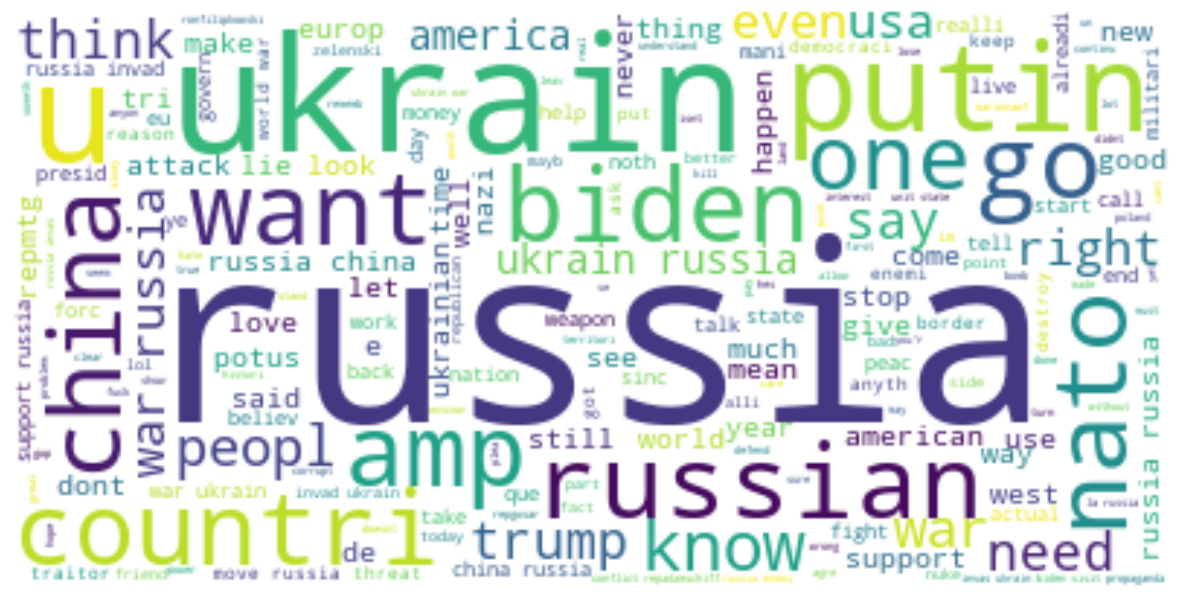

In [34]:
#  Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets 
# by people sharing their feelings and updates about the Ukraine and Russia war:

text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
 # Now I will add three more columnsin this dataset as Positive, Negative, and Neutral by calculating
# the sentiment scores of the tweets:

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df =df[["tweet", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0   could done better prepar us face russia he be...     0.563     0.000   
1  alexisfptierno nicexav modrussia é guerra meu ...     0.000     0.000   
2  mattwalshblog zero understand foreign polici p...     0.000     0.000   
3  repgosar disgust   move russia  cant believ re...     0.126     0.437   
4   grillocogitandi putino americani americaninat...     0.000     0.000   

   Neutral  
0    0.437  
1    1.000  
2    1.000  
3    0.437  
4    1.000  


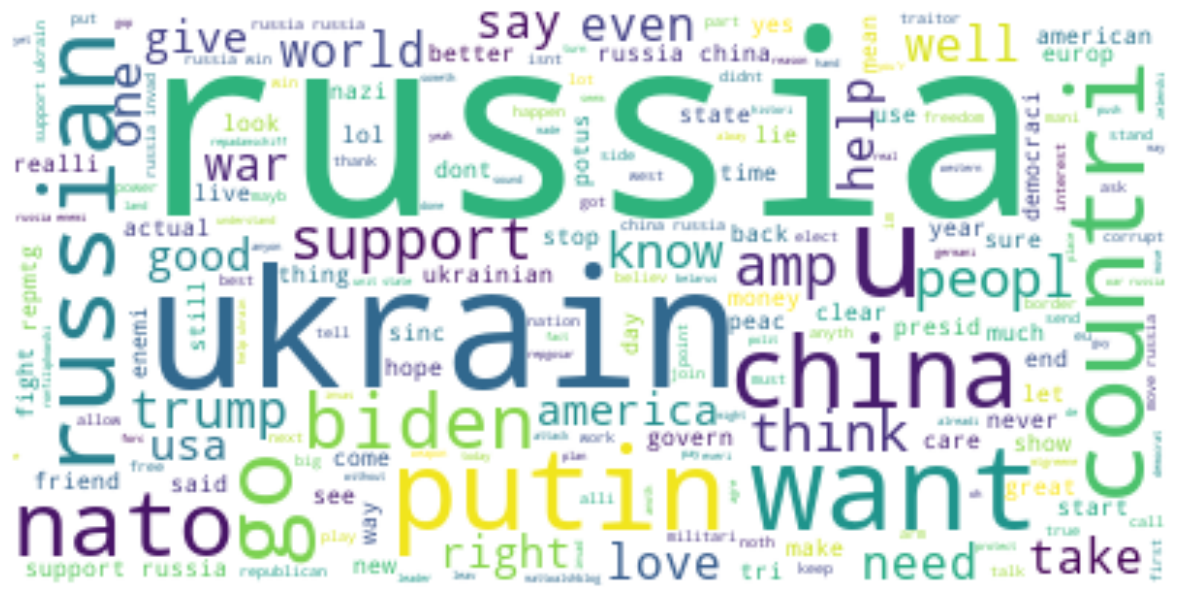

In [38]:
# Now let’s have a look at the most frequent words used by people with positive sentiments:
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

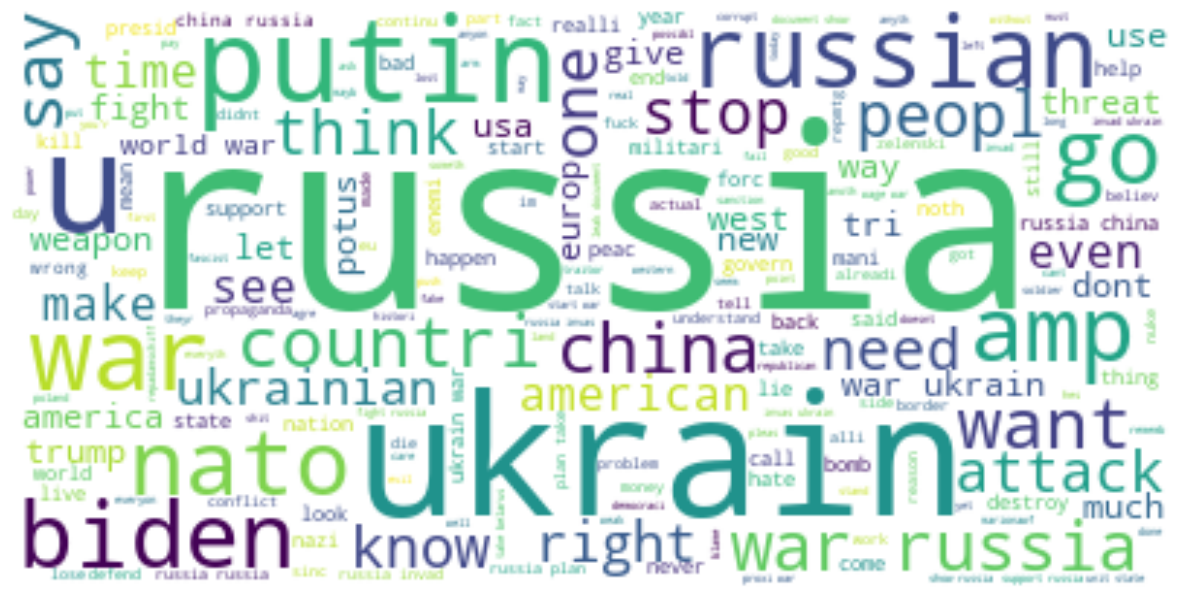

In [40]:
# Now let’s have a look at the most frequent words used by people with negative sentiments:


negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()